# PDSDS: Chapter 1

In [4]:
# Packages

%matplotlib inline

from pathlib import Path

import pandas as pd
import numpy as np
from scipy.stats import trim_mean
from statsmodels import robust
import wquantiles

import seaborn as sns
import matplotlib.pylab as plt

## Estimates of Location

In [6]:
state = pd.read_csv("state.csv")

state.head()

,State,Population,Murder.Rate,Abbreviation
0,Alabama,4779736,5.7,AL
1,Alaska,710231,5.6,AK
2,Arizona,6392017,4.7,AZ
3,Arkansas,2915918,5.6,AR
4,California,37253956,4.4,CA


In [9]:
# Mean
print(state["Population"].mean())

# Trimmed Mean- Drop 10% from each end
print(trim_mean(state["Population"], .1))

# Median
print(state["Population"].median())

6162876.3
4783697.125
4436369.5


In [14]:
# Weighted Mean
print(np.average(state["Murder.Rate"], weights = state["Population"]))

# Weighted Median via wquantiles
print(wquantiles.median(state["Murder.Rate"], weights = state["Population"]))

4.445833981123393
4.4


## Estimates of Variability

In [16]:
# Standard Deviation
print(state["Population"].std())

# Interquartile Range (IQR)
print(state["Population"].quantile(.75) - state["Population"].quantile(.25))

# Mean Absolute Deviation from Median (MAD) --> Courtesy of statsmodels package
print(robust.scale.mad(state["Population"]))

6848235.347401142
4847308.0
3849876.1459979336


## Exploring the Data Distribution

In [17]:
# Percentiles of Murder Rate
state["Murder.Rate"].quantile([.05, .25, .5, .75, .95])

0.05    1.600
0.25    2.425
0.50    4.000
0.75    5.550
0.95    6.510
Name: Murder.Rate, dtype: float64

Text(0, 0.5, 'Population (millions)')

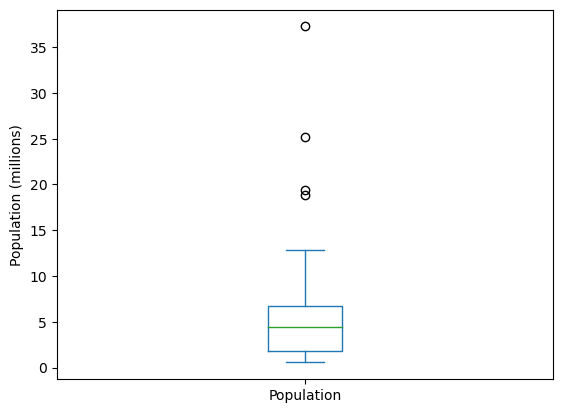

In [18]:
# Boxplot --> Basic boxplot can be done with pandas
ax = (state["Population"] / 1_000_000).plot.box()
ax.set_ylabel("Population (millions)")

In [20]:
# Frequency Table
population_frequency = pd.cut(state["Population"], 10)
population_frequency.value_counts()

(526935.67, 4232659.0]      24
(4232659.0, 7901692.0]      14
(7901692.0, 11570725.0]      6
(11570725.0, 15239758.0]     2
(15239758.0, 18908791.0]     1
(18908791.0, 22577824.0]     1
(22577824.0, 26246857.0]     1
(33584923.0, 37253956.0]     1
(26246857.0, 29915890.0]     0
(29915890.0, 33584923.0]     0
Name: Population, dtype: int64

Text(0.5, 0, 'Population (millions)')

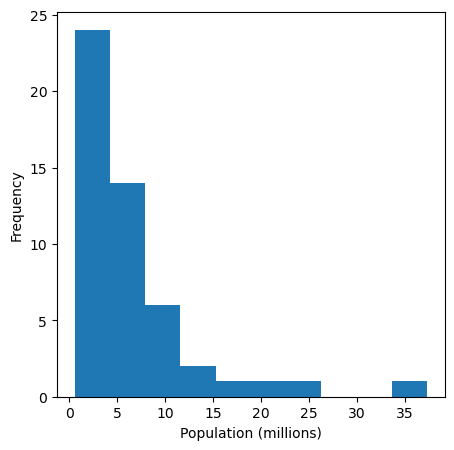

In [21]:
# Histogram
ax = (state["Population"] / 1_000_000).plot.hist(figsize = (5, 5))
ax.set_xlabel("Population (millions)")

Text(0.5, 0, 'Murder Rate (per 100,000)')

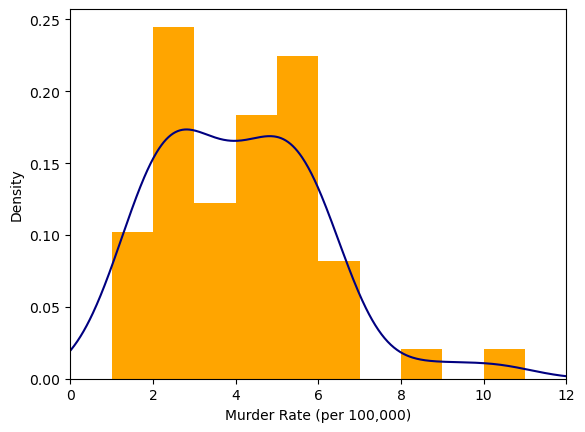

In [26]:
# Density Estimate
ax = state["Murder.Rate"].plot.hist(density = True, xlim = [0, 12], bins = range(1, 12), color = "orange")

# 'bw_method' refers to bandwidth to control smoothness of density curve
# Bandwidth selection methods (e.g. silverman) can be adjusted as needed
state["Murder.Rate"].plot.density(ax = ax, bw_method = .5, color = "navy")
ax.set_xlabel("Murder Rate (per 100,000)")

## Exploring Binary and Categorical Data

In [27]:
dfw = pd.read_csv("dfw_airline.csv")

dfw.head()

,Carrier,ATC,Weather,Security,Inbound
0,64263.16,84856.5,11235.42,343.15,118427.82


Text(0, 0.5, 'Count')

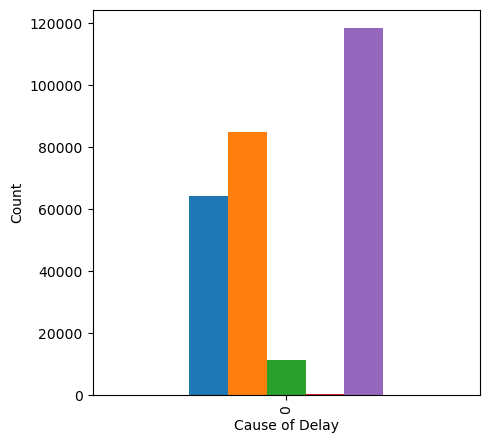

In [29]:
# Data needs to be transposed due to its shape, otherwise the following happens:
ax = dfw.plot.bar(figsize = (5, 5), legend = False)
ax.set_xlabel("Cause of Delay")
ax.set_ylabel("Count")

Text(0, 0.5, 'Count')

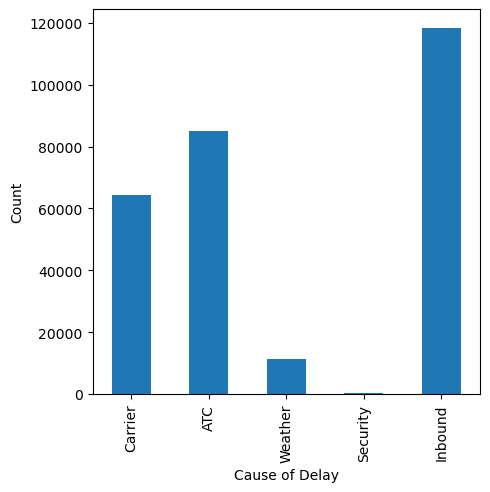

In [28]:
# Boxplot (Transposed dfw)
ax = dfw.transpose().plot.bar(figsize = (5, 5), legend = False)
ax.set_xlabel("Cause of Delay")
ax.set_ylabel("Count")

## Correlation

In [37]:
sp500_data = pd.read_csv("sp500_data.csv", index_col = 0)

sp500_data.head()

,ADS,CA,MSFT,RHT,CTSH,CSC,EMC,IBM,XRX,ALTR,...,WAT,ALXN,AMGN,BXLT,BIIB,CELG,GILD,REGN,VRTX,HSIC
1993-01-29,0.0,0.060124,-0.022100,0.0,0.0,0.018897,0.007368,0.092165,0.259140,-0.007105,...,0.0,0.0,0.34716,0.0,0.04167,0.00000,0.015564,1.75,0.1250,0.0
1993-02-01,0.0,-0.180389,0.027621,0.0,0.0,0.018889,0.018425,0.115207,-0.100775,0.063893,...,0.0,0.0,-0.23144,0.0,0.00000,-0.01041,0.007782,1.25,0.1250,0.0
1993-02-02,0.0,-0.120257,0.035900,0.0,0.0,-0.075573,0.029482,-0.023041,0.028796,-0.014192,...,0.0,0.0,-0.11572,0.0,0.00000,0.00000,-0.007792,-0.25,0.0000,0.0
1993-02-03,0.0,0.060124,-0.024857,0.0,0.0,-0.151128,0.003689,-0.253454,-0.043190,-0.007105,...,0.0,0.0,-0.08679,0.0,0.04167,-0.04167,-0.038919,-0.50,0.0625,0.0
1993-02-04,0.0,-0.360770,-0.060757,0.0,0.0,0.113350,-0.022114,0.069862,0.000000,-0.007096,...,0.0,0.0,0.14465,0.0,-0.04166,-0.03126,-0.046711,0.00,0.0625,0.0


In [38]:
sp500_sectors = pd.read_csv("sp500_sectors.csv")

sp500_sectors.head()

,sector,sector_label,sub_sector,symbol
0,information_technology,Technology,data_processing_&_outsourced_services,ADS
1,information_technology,Technology,systems_software,CA
2,information_technology,Technology,systems_software,MSFT
3,information_technology,Technology,systems_software,RHT
4,information_technology,Technology,it_consulting_&_services,CTSH


<Axes: >

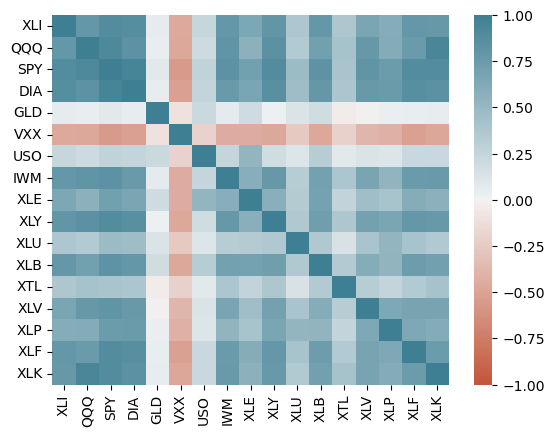

In [39]:
# Heat Map (Correlation Plot Substitute)
etfs = sp500_data.loc[sp500_data.index > "2012-07-01",
sp500_sectors[sp500_sectors["sector"] == "etf"]["symbol"]]

sns.heatmap(etfs.corr(), vmin = -1, vmax = 1, cmap = sns.diverging_palette(20, 220, as_cmap = True))

## Exploring Two or More Variables

In [44]:
kc = pd.read_csv("kc_tax.csv")

kc.head()

,TaxAssessedValue,SqFtTotLiving,ZipCode
0,NaN,1730,98117.0
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0


In [48]:
kc_tax = kc.loc[(kc.TaxAssessedValue < 750000) & 
                     (kc.SqFtTotLiving > 100) &
                     (kc.SqFtTotLiving < 3500), :]

print(kc_tax.shape)
kc_tax.head()

(432693, 3)


,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0


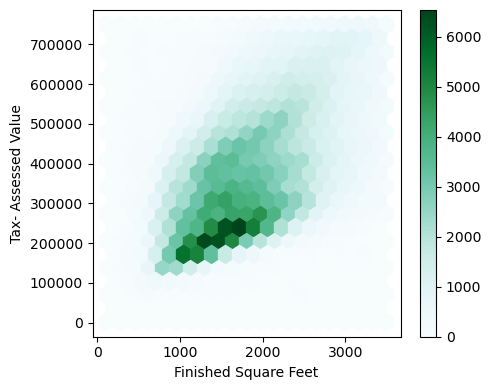

In [50]:
ax = kc_tax.plot.hexbin(x = "SqFtTotLiving", y = "TaxAssessedValue",
                         gridsize = 20, sharex = False, figsize = (5, 4))
ax.set_xlabel("Finished Square Feet")
ax.set_ylabel("Tax- Assessed Value")

plt.tight_layout()
plt.show()